In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

#  Import and read the diabetes_data.csv.
import pandas as pd
diabetes_data_df = pd.read_csv('https://raw.githubusercontent.com/ComfyKoala/diabetes-classification/main/Stephen/diabetes_data.csv')
# Display the first few rows
diabetes_data_df.head()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,TinglingHandsFeet,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,6000,44,0,1,2,1,32.985284,1,4.499365,2.443385,...,1,73.765109,0,0,0,1.782724,4.486980,7.211349,1,Confidential
1,6001,51,1,0,1,2,39.916764,0,1.578919,8.301264,...,0,91.445753,0,0,1,3.381070,5.961705,5.024612,1,Confidential
2,6002,89,1,0,1,3,19.782251,0,1.177301,6.103395,...,0,54.485744,0,0,0,2.701019,8.950821,7.034944,0,Confidential
3,6003,21,1,1,1,2,32.376881,1,1.714621,8.645465,...,0,77.866758,0,0,1,1.409056,3.124769,4.717774,0,Confidential
4,6004,27,1,0,1,3,16.808600,0,15.462549,4.629383,...,0,37.731808,0,0,0,1.218452,6.977741,7.887940,0,Confidential


In [8]:
# Prepare the data
features = [
    'FamilyHistoryDiabetes', 'GestationalDiabetes', 'PolycysticOvarySyndrome',
    'PreviousPreDiabetes', 'Hypertension', 'SystolicBP', 'DiastolicBP',
    'FastingBloodSugar', 'HbA1c', 'SerumCreatinine', 'BUNLevels',
    'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides'
]

X = diabetes_data_df[features]
y = diabetes_data_df['Diagnosis']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [10]:
# Step 3: Feature Selection with RFE
log_model = LogisticRegression(max_iter=1000)

# Correct the n_features_to_select syntax
rfe = RFE(estimator=log_model, n_features_to_select=5)
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]

# Display the selected features
print("Selected Features by RFE:")
print(selected_features)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Selected Features by RFE:
Index(['FamilyHistoryDiabetes', 'PolycysticOvarySyndrome',
       'PreviousPreDiabetes', 'Hypertension', 'HbA1c'],
      dtype='object')


In [13]:
# Step 4: Decision Tree Analysis
tree_model = DecisionTreeClassifier(random_state=10)
tree_model.fit(X_train[selected_features], y_train)
y_pred = tree_model.predict(X_test[selected_features])
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Confusion Matrix:
 [[261  86]
 [ 99 118]]

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.75      0.74       347
           1       0.58      0.54      0.56       217

    accuracy                           0.67       564
   macro avg       0.65      0.65      0.65       564
weighted avg       0.67      0.67      0.67       564



Class 0 (Not Diabetic) Performance:

The model performs reasonably well in predicting non-diabetic patients, with a precision of 72% and recall of 75%. This indicates that the model is relatively good at identifying non-diabetic patients and correctly excluding them from being falsely diagnosed with diabetes.
Class 1 (Diabetic) Performance:

The model's performance in predicting diabetic patients is weaker, with a precision of 58% and recall of 54%. This means that nearly half of the actual diabetic patients are either missed (false negatives) or the model incorrectly predicts non-diabetic patients as diabetic.
Overall Performance:

The accuracy of 67% indicates that the model correctly predicts about two-thirds of the cases, but this overall metric might be misleading because it doesn’t account for the imbalance between classes.
The macro average F1-score of 0.65 shows a balance between precision and recall across both classes, but the lower performance on the diabetic class (class 1) suggests that the model could be missing a significant portion of diabetic patients.

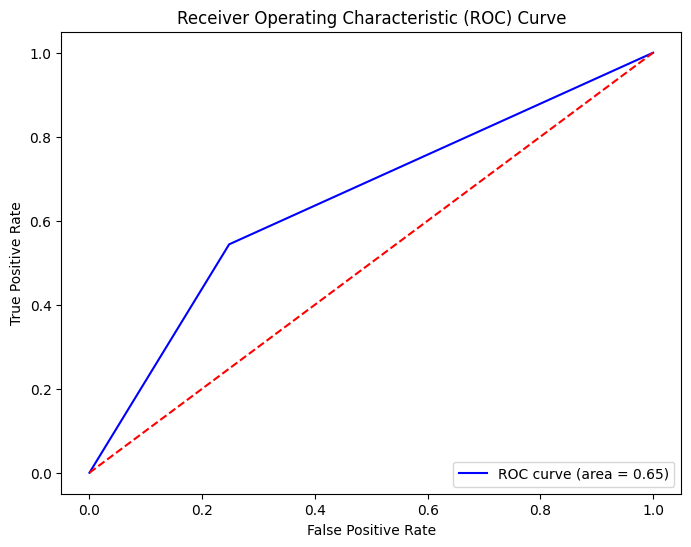

ROC AUC Score: 0.6480


In [14]:
# Step 5: ROC Curve Analysis
y_proba = tree_model.predict_proba(X_test[selected_features])[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
print(f"ROC AUC Score: {roc_auc:.4f}")


AUC (Area Under the Curve) refers to the area under the ROC (Receiver Operating Characteristic) curve. The ROC curve plots the True Positive Rate (Sensitivity) against the False Positive Rate (1-Specificity) across different thresholds.

AUC Score Range:
* 0.5: Represents a model with no discrimination capability (equivalent to random guessing).
* 0.5 to 0.7: Indicates poor to fair discrimination ability. The model is slightly better than random guessing but not very effective.
* 0.7 to 0.8: Indicates a moderately effective model.
* 0.8 to 0.9: Represents a good model.
* 0.9 and above: Represents an excellent model with high discrimination ability.

Interpretation (AUC = 0.6457):
AUC = 0.6457 falls within the range of 0.5 to 0.7, which indicates that your model has poor to fair discrimination capability.
The model is slightly better than random guessing at distinguishing between diabetic and non-diabetic patients, but it is not a strong predictor.